In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
epoch = np.arange(1,21)

test_kld = [78.22348396,64.3529093,55.98512336,52.49224398,47.35824796,
            42.30582069,39.29991501,35.74380745,34.30111121,31.24090256,
            29.60194336,28.00885489,26.1704435,24.8655301,24.69617876,
            23.10638157,21.53759482,20.97318583,19.83895207,19.37167402]
train_rce = [28.23641028,7.713137427,4.962970837,4.155763523,3.848460194,
             3.688562008,3.621900024,3.611114304,3.630984691,3.669127677,
             3.722156569,3.782962175,3.84773954,3.919819833,3.99282415,
             4.065783968,4.137855084,4.207985319,4.278697747,4.360362171]
test_rce = [11.95954627,4.781268479,3.836301492,2.857723404,2.922837519,
            2.659047586,2.426967496,2.510343701,2.44692384,2.567698403,
            2.583823952,2.646803669,2.756657935,2.854735623,2.848115659,
            3.013809323,3.436687311,6.795642728,7.692632605,8.9509965]

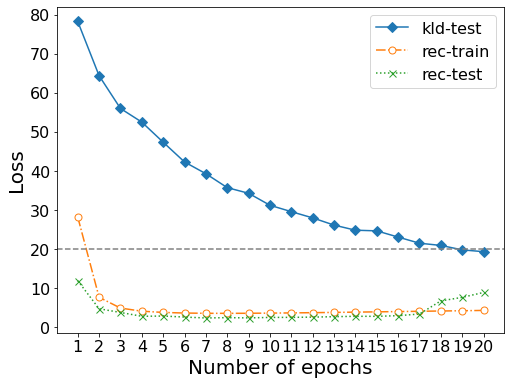

In [28]:
plt.figure(figsize=(8, 6))

plt.plot(epoch, test_kld, label='kld-test', linestyle='-', marker='D', markersize=7)
plt.plot(epoch, train_rce, label='rec-train', linestyle='-.', marker='o', markerfacecolor='white', markersize=7)
plt.plot(epoch, test_rce, label='rec-test', linestyle=':', marker='x', markersize=7)
plt.axhline(y=20, color='gray', linestyle='--')

plt.xlabel('Number of epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(epoch, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


#### Unconditioned Sampling

In [2]:
Novelty = [0.8419,0.6949,0.7931,0.9143,0.9498,0.8144,0.6756,0.7920]
Snn = [0.6015,0.6260,0.6081,0.5477,0.5371,0.6179,0.6513,0.6244]

In [3]:
X = np.array(Novelty).reshape(-1, 1)
y = np.array(Snn)
reg = LinearRegression().fit(X, y)
reg.predict(X)

array([0.58918531, 0.64619176, 0.6081099 , 0.56110867, 0.5473418 ,
       0.59984978, 0.65367628, 0.60853648])

(array([0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

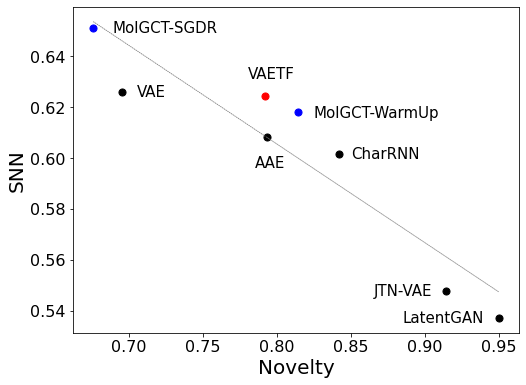

In [4]:
plt.figure(figsize=(8, 6))

plt.plot(Novelty[2:], reg.predict(X)[2:], color='gray', linewidth=0.8, linestyle=':')

plt.scatter([0.8419,0.6949,0.7931,0.9143,0.9498],
            [0.6015,0.6260,0.6081,0.5477,0.5371],

            marker='o', s=50, color='black')
plt.text(0.85, 0.6015, 'CharRNN', ha='left', va='center', fontsize=15)
plt.text(0.705, 0.6260, 'VAE', ha='left', va='center', fontsize=15)
plt.text(0.785, 0.5981, 'AAE', ha='left', va='center', fontsize=15)
plt.text(0.905, 0.5477, 'JTN-VAE', ha='right', va='center', fontsize=15)
plt.text(0.94, 0.5371, 'LatentGAN', ha='right', va='center', fontsize=15)

plt.scatter([0.8144,0.6756], [0.6179,0.6513],
            marker='o', s=50, color='blue')
plt.text(0.8244, 0.6179, 'MolGCT-WarmUp', ha='left', va='center', fontsize=15)
plt.text(0.6885, 0.6513, 'MolGCT-SGDR', ha='left', va='center', fontsize=15)

plt.scatter([0.7920], [0.6244],
            marker='o', s=50, color='red')
plt.text(0.78, 0.633, 'VAETF', ha='left', va='center', fontsize=15)

plt.xlabel('Novelty', fontsize=20)
plt.ylabel('SNN', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#### Scaffold Conditioned Sampling

In [10]:
met1 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf1-15/molgpt/metric.csv', index_col=[0])
met2 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf2-16/molgpt/metric.csv', index_col=[0])
met3 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf3-16/molgpt/metric.csv', index_col=[0])

del met1['scaffold'], met2['scaffold'], met3['scaffold']
met = (met1 + met2 + met3) / 3
selected_met = met[['valid', 'unique', 'novel', 'sim80']]
selected_met = selected_met.rename(columns={ 'valid': 'validity',
                                             'unique': 'uniqueness',
                                             'novel': 'novelty',
                                             'sim80': 'sim_ratio' })

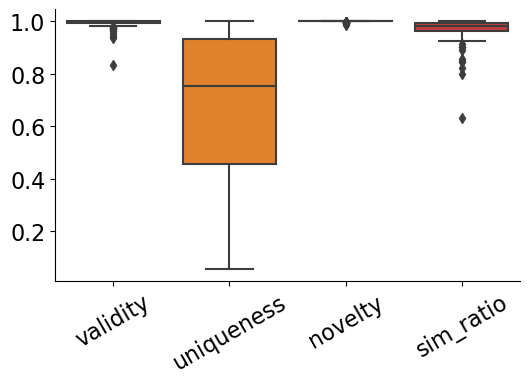

In [14]:
plt.figure(figsize=(6,3.6), dpi=100)
box_plot = sns.boxplot(data=selected_met)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30, fontsize=16)
box_plot.tick_params(axis='y', labelsize=16)
box_plot.spines['top'].set_visible(False)
box_plot.spines['right'].set_visible(False)

In [6]:
df

,validity,uniqueness,novelty,sim_ratio
0,1.000000,0.920000,1.000000,0.983333
1,0.993333,0.635034,0.993939,0.912449
2,1.000000,0.980000,1.000000,0.953333
3,1.000000,0.583333,1.000000,0.976667
4,0.996667,0.304343,1.000000,0.983266
...,...,...,...,...
95,1.000000,0.630000,1.000000,0.980000
96,0.996667,0.792492,1.000000,0.980000
97,1.000000,0.436667,1.000000,0.983333
98,0.996667,0.986599,1.000000,0.963232
